<a href="https://colab.research.google.com/github/pejmanrasti/NLP/blob/main/NLP_Representing_text_in_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for NLP 



# WordNet

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn
# look up all the synsets that use a given word
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
 wn.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [ ]:
# Focus on "dog" and "cat" the animals
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

In [ ]:
# Similarity
dog.path_similarity(cat)

0.2

In [ ]:
# Why? Let's check for hypernyms of dog and cat
print(dog.hypernyms()) # dog IS-A canine
print(cat.hypernyms()) # cat IS-A feline

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('feline.n.01')]


In [ ]:
canine = wn.synset('canine.n.02')
feline = wn.synset('feline.n.01')
# check now hypernyms of canine and feline
canine.hypernyms(), feline.hypernyms()
# canine IS-A carnivore and feline IS-A carnivore
# We found the shortest path from cat to dog


([Synset('carnivore.n.01')], [Synset('carnivore.n.01')])




# Count-Based Representations




In [13]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# Co-Occurences of dog, lion and car 
# (leash, walk, run, owner, pet, barked, the)
dog = [3,  5,   2,   5,     3,   2 ,    9]
lion = [0, 3,   2,   0,     1,   0,     5]
car = [0,  0,   1,   3,     0,   0,     9]

dog = np.array(dog)
lion = np.array(lion)
car =  np.array(car)

def cosine(v1, v2):
  """
  cosine similarity of two vectors
  NB: Standard metric to measure similarity between word vectors
  """
  return dot(v1, v2)/(norm(v1)*norm(v2))

print(f'Example 1: Original similarities \nCosine Similarity dog vs. lion {cosine(dog, lion)} ')
print(f'Cosine Similarity dog vs. car {cosine(dog, car)} \n')




Example 1: Original similarities 
Cosine Similarity dog vs. lion 0.8562344018852232 
Cosine Similarity dog vs. car 0.8198899317865649 



In [14]:
# Now assume 'the dog' and 'the car' appear much more 
dog = [3,  5,   2,   5,     3,   2 ,    24]
car = [0, 0, 1, 3, 0, 0,                24]
print(f'Example 2: Now assume "the dog" and "the car" appear much more  \nCosine Similarity dog vs. lion {cosine(dog, lion)}')
print(f'Cosine Similarity dog vs. car {cosine(dog, car)} ')
print(f'What do you observe? \n')
# Very high sensitivity to very frequent words 




Example 2: Now assume "the dog" and "the car" appear much more  
Cosine Similarity dog vs. lion 0.8904965536163051
Cosine Similarity dog vs. car 0.9593610617759626 
What do you observe? 



In [15]:
# Now assume 
dog = [3+1,  5,   2,   5,     3,   2 ,    9]
car = [0+1, 0, 1, 3, 0, 0, 9]
dog = np.array(dog)
print(f'Example 3: Now we add only two occurences in leash \nCosine Similarity dog vs. lion {cosine(dog, lion)} ')
print(f'Cosine Similarity dog vs. car {cosine(dog, car)}')
print(f'What do you observe? \n')
# Very high sensitivity to very frequent words 

Example 3: Now we add only two occurences in leash 
Cosine Similarity dog vs. lion 0.8377618414945953 
Cosine Similarity dog vs. car 0.8303942515079411
What do you observe? 



In [16]:
# (leash, walk, run, owner, pet, barked, the)
import numpy as np

dog = np.array([3,  5,   2,   5,     3,   2 ,    8])
lion = np.array([0, 3,   2,   0,     1,   0,     6])
car = np.array([0,  0,   1,   3,     0,   0,     3])

leash = np.array([3, 0, 0])
walk = np.array([5, 3, 0])
run = np.array([2, 2, 1])
owner = np.array([5, 0, 3])
pet = np.array([3, 1, 0])
barked = np.array([2, 0, 0])
the = np.array([8, 6, 3])

context = [leash, walk, run, owner, pet, barked, the]
total_pairs = sum(a for vec in context for a in vec)
print(total_pairs)

dog_pmi = [f"{np.log(_dog*total_pairs/(np.sum(_dog)*np.sum(context[i][0]))):0.2f}" for i, _dog in enumerate(dog)]
lion_pmi = [f"{np.log(_lion*total_pairs/(np.sum(_lion)*np.sum(context[i][1]))):0.2f}" if _lion != 0 else 0 for i, _lion in enumerate(lion)]
car_pmi = [f"{np.log(_car*total_pairs/(np.sum(_car)*np.sum(context[i][2]))):0.2f}" if _car!= 0 else 0 for i, _car in enumerate(car)]

print(dog_pmi)
print(lion_pmi)
print(car_pmi)

47
['2.75', '2.24', '3.16', '2.24', '2.75', '3.16', '1.77']
[0, '2.75', '3.16', 0, '3.85', 0, '2.06']
[0, 0, '3.85', '2.75', 0, 0, '2.75']


# Prediction-Based Representation: Word2vec - Skip Gram

In [1]:
!git clone https://github.com/facebookresearch/fastText.git
!pip install fastText/.
# Load model
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
!unzip wiki.en.zip
import fasttext
w2v = fasttext.load_model('wiki.en.bin')
#model = fastText.load_model("cc.en.300.bin")# Load model
#

Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 3930 (delta 28), reused 42 (delta 11), pack-reused 3854
Receiving objects: 100% (3930/3930), 8.33 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (2445/2445), done.
Processing ./fastText
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3122331 sha256=ecd1e0f78d01b8155a7a2f45f917a91dd968fe22b938842378e20219fb3a0a2f
  Stored in d

In [3]:
import numpy as np
vector = w2v.get_word_vector("dog")
# Dimensions ? 
print(vector.shape)
# How many words in the vocabulary ?
len(w2v.words)



(300,)


2519370

In [6]:
# Here is a sample of the vocabulary 
[w2v.words[i] for i in range(20)]

[',',
 '.',
 'the',
 '</s>',
 'of',
 '-',
 'in',
 'and',
 "'",
 ')',
 '(',
 'to',
 'a',
 'is',
 'was',
 'on',
 's',
 'for',
 'as',
 'by']

In [10]:
# Visualization
from sklearn.decomposition import PCA
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

def plot_word2vec_embedding(model: fasttext.FastText._FastText, projection="pca", 
                            words=None, 
                            plot_dir=None,
                            sample=0):
        
    w2v = np.array([model.get_word_vector(w) for w in words])

    if projection == "pca":
      pca_representations = PCA().fit_transform(w2v)[:,:2]
    else:
      raise(Exception(f"{projection} not supported"))
    
    plt.figure(figsize=(6,6))
    plt.scatter(pca_representations[:,0], pca_representations[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, pca_representations):
        plt.text(x+0.05, y+0.05, word)
    if plot_dir:
      plt.savefig(plot_dir)

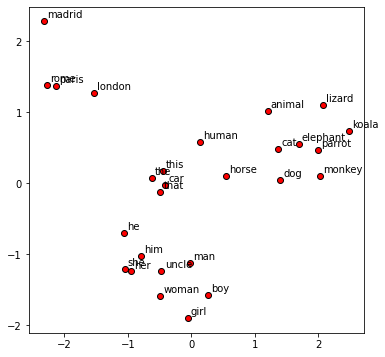

In [11]:
plot_word2vec_embedding(w2v, 
                        words = ['dog', 'cat', 'animal', 'elephant', 'car', 'human','horse', 'monkey', 'parrot', 'koala', 'lizard',
                         #  'eating', 'barking',
                         'man', 'woman',"girl","boy","uncle", 
                         "he", "she", "her", "him",
                         "the", "that","this",
                         'paris', 'madrid', 'london', "rome"],
                         plot_dir="./plot_2.png",
                         )

In [12]:
pairs = [("tigers", "tigers"),
         ("dollar", "buck"),
         ("dollar", "profit"),
         ("smart", "stupid")
         ]

In [13]:
from numpy import dot
from numpy.linalg import norm

for (w1, w2) in pairs:
  v1 = w2v.get_word_vector(w1)
  v2 = w2v.get_word_vector(w2)
  print(f"Cosine: {w1} vs. {w2} {dot(v1, v2)/(norm(v1)*norm(v2))}")

Cosine: tigers vs. tigers 1.0000001192092896
Cosine: dollar vs. buck 0.3065042495727539
Cosine: dollar vs. profit 0.3420848250389099
Cosine: smart vs. stupid 0.4128660261631012
